In [31]:
import numpy as np
import json
from os import listdir

import pandas as pd

import matplotlib.pyplot as plt

from scipy.spatial.distance import directed_hausdorff

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

"""
    directed_hausdorff
    @parameters: two input arrays (U, V)
    seed: int or none
    
    @output: d: double - the directed hausdorff distance between the two arrays
    index1: index of point contributing to hausdorff pair in U
    index2: index of point contributing to hausdorff pair in V
"""

'\n    directed_hausdorff\n    @parameters: two input arrays (U, V)\n    seed: int or none\n    \n    @output: d: double - the directed hausdorff distance between the two arrays\n    index1: index of point contributing to hausdorff pair in U\n    index2: index of point contributing to hausdorff pair in V\n'

In [36]:
folders = [f for f in listdir("data/input")]
folders = ['newData']

for folder in folders:
    onlyfiles = [f for f in listdir("data/input/{}".format(folder)) ]
    data = []
    for file in onlyfiles:
        with open("data/input/{}/{}".format(folder, file)) as f:
            d = json.load(f)
            df = pd.json_normalize(d[0]).to_numpy()
            data.append(df)

In [37]:
hausdorff = []
for i in range(len(data)):
    each = []
    for j in range(len(data)):
        uv = directed_hausdorff(data[i], data[j])
        vu = directed_hausdorff(data[j], data[i])
        haus = max(uv[0], vu[0])
        each.append(haus)
    hausdorff.append(each)

C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


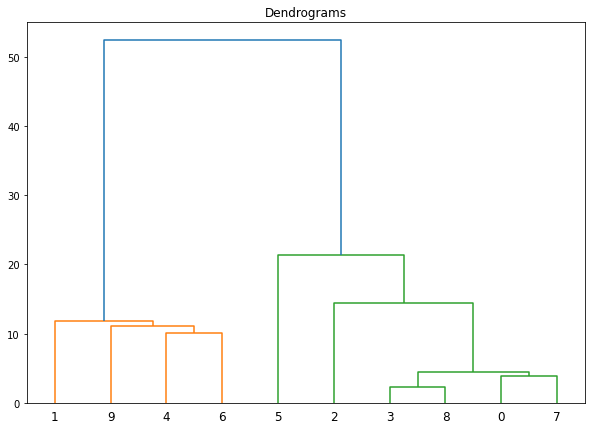

In [43]:
Z = linkage(hausdorff,method='single')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)
# print(dend)

In [47]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='single')

cluster.fit(hausdorff)
labels = cluster.labels_
labels



array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [2]:
with open('0.2.json') as f:
    data1 = json.load(f)
    
with open('0.14.json') as f:
    data2 = json.load(f)
    
with open('219.json') as f:
    data3 = json.load(f)
    print(len(data3[0]))

73


In [3]:
df1 = pd.json_normalize(data1[0]).to_numpy()
df2 = pd.json_normalize(data2[0]).to_numpy()
df3 = pd.json_normalize(data3[0]).to_numpy()
print(len(df3))

73


In [4]:
directed_hausdorff(df1, df3)

(17.1038630704198, 214, 47)

In [5]:
directed_hausdorff(df3, df1)

(5.493204203777609, 64, 49)

In [6]:
max(directed_hausdorff(df1, df2)[0], directed_hausdorff(df2, df1)[0])

0.31066561203325993

In [7]:
directed_hausdorff(df1, df2)

(0.31066561203325993, 30, 43)